,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score sum,score average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit_demo as st
from matplotlib.figure import Figure
import seaborn as sns
import numpy as np

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

In [10]:
def hello_print():
    random_string = "hello"
    print("hello"+ random_string)

In [12]:
hello_print()

hellohello
hellohello
hellohello


In [13]:
def hello_print_arg(random_string):
    print("hello "+random_string)

In [16]:
hello_print_arg("tara")
hello_print_arg("ariana")
hello_print_arg("albert")

hello tara
hello ariana
hello albert


In [38]:
# create a function that takes in the location of a csv and returns the pandas dataframe with the score sum and score avg columns
def create_df(file_path):
    students_df = pd.read_csv(file_path)
    students_df.head()
    students_df['score sum'] = students_df['math score'] + students_df['reading score'] + students_df['writing score']
    students_df['score average'] = (students_df['math score'] + students_df['reading score'] + students_df['writing score'])/3
    return students_df

In [27]:
def graph_scatter(students_df):
    sns.scatterplot(data=students_df, x= 'writing score', y='math score', hue = 'all scores')
    sns.scatterplot(data=students_df, x='writing score', y='reading score', hue = 'all scores')
    #m, c = np.polyfit(students_df['writing score'], students_df['reading score'], 1)
    #plt.plot(students_df['writing score'], m*students_df['writing score']+c, hue='red', label='Reading LOBF')
    #a, b = np.polyfit(students_df['math score'], students_df['reading score'], 1)
    #plt.plot(students_df['writing score'], a*students_df['writing score']+b, hue='black', label='Math LOBF')
    ax.set_xlabel("Writing Score")
    ax.set_ylabel("Score")
    plt.show()

In [23]:
def concat_scatter_scores(students_df):
    math_scores = students_df['math score'].tolist()
    reading_scores = students_df['reading score'].tolist()
    writing_scores = students_df['writing score'].tolist()

    full_writing_scores = writing_scores + writing_scores
    full_scores = reading_scores + math_scores

    score_type = []
    for i in range(len(writing_scores)):
        score_type.append('reading')
    for i in range(len(writing_scores)):
        score_type.append('math')

    scores_dict = {'score type': score_type,'all scores': full_scores, "writing scores": full_writing_scores}
    scores = pd.DataFrame.from_dict(scores_dict)
    
    fig = Figure()
    ax = fig.subplots()
    sns.scatterplot(data=scores, x="writing scores", y='all scores', hue='score type', ax=ax)
    
    
    return fig

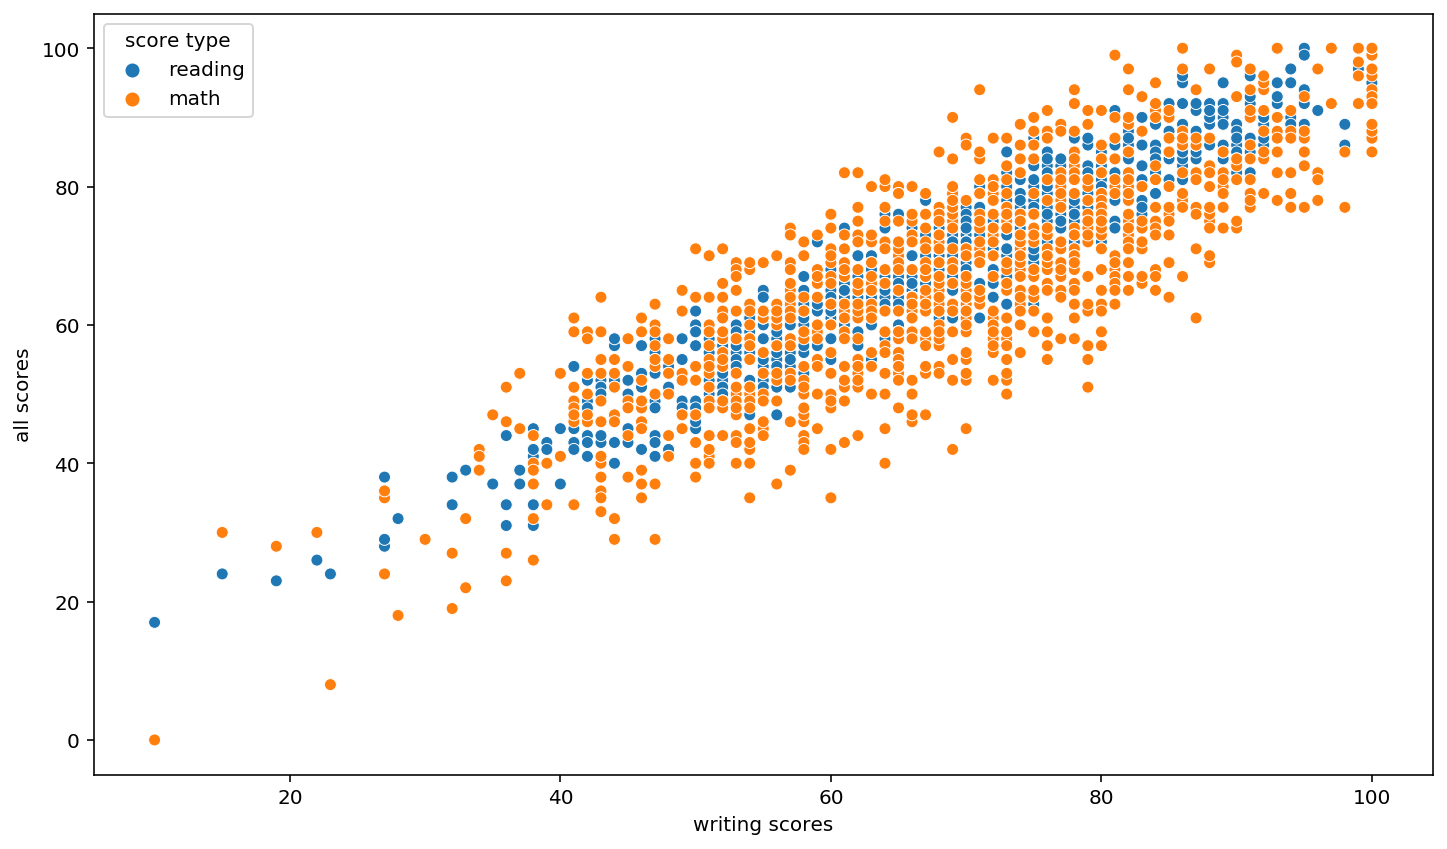

In [273]:
concat_scatter_scores(students_df)

In [166]:
def sns_scatter(students_df):
    fig = Figure()
    ax = fig.subplots()
    sns.scatterplot(data = students_df, x = students_df['writing score'], y=students_df['math score'], ax=ax)
    ax.set_xlabel("Writing Score")
    ax.set_ylabel("Score")
    return fig

In [232]:
graph_scatter(students_df)
sns_scatter(students_df)

ValueError: Could not interpret value `all scores` for parameter `hue`

In [39]:
students_df = create_df('data/StudentsPerformance.csv')

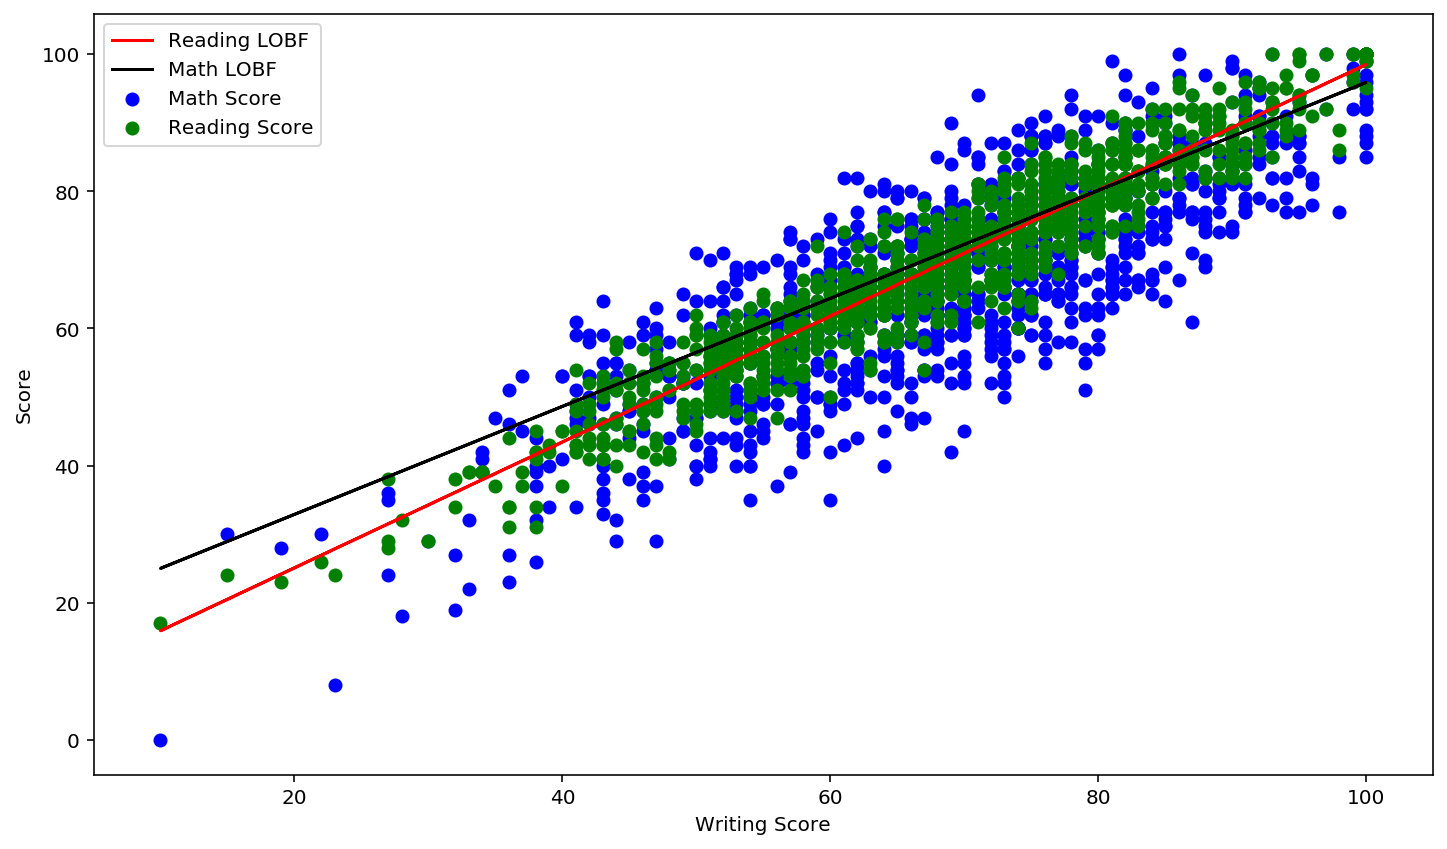

In [118]:
graph_scatter(students_df)

In [124]:
# create a function that displays the bar graph of parents' college background and their students' scores
def create_college_bars(students_df):
    stu_gr = students_df.groupby(['parental level of education'])['score average'].mean().reset_index()
    stugr_sorted = stu_gr.sort_values('score average')

    plt.bar(stugr_sorted['parental level of education'], stugr_sorted['score average'],color='orange')
    plt.xlabel("Parental Level of Education", size = 20 )
    plt.ylabel("Score Average", size = 20 )
    plt.title("Parents College Background Vs Test Scores", size = 20)

    plt.show()

In [261]:
def sns_barplot(students_df):
    fig = Figure()
    ax = fig.subplots()
    stu_gr = students_df.groupby(['parental level of education'])['score average'].mean().reset_index()
    stugr_sorted = stu_gr.sort_values('score average')
    sns.barplot(data = stugr_sorted, x = stugr_sorted['parental level of education'], y=stugr_sorted['score average'])
    ax.set_xlabel("Parental Level of Education", size = 20 )
    ax.set_ylabel("Score Average", size = 20 )
    ax.set_title("Parents College Background Vs Test Scores", size = 20)
    ax.set_xlim(0,100)

In [97]:
def plotly_barplot(students_df, column_var = 'average score'):
    stu_gr = students_df.groupby(['parental level of education'])[column_var].mean().reset_index()
    stugr_sorted = stu_gr.sort_values(column_var)
    df = stugr_sorted
    fig = px.bar(df, x='parental level of education', y=column_var)
    return fig

score_selection = st.radio("Select Certain Scores", ('writing score', 'reading score', 'math score', 'average score'))
plotly_barplot(students_df, score_selection)

AttributeError: module 'streamlit_demo' has no attribute 'radio'

### def plotly_barplot_2(students_df, column_var = 'score average'):
    column_var = 'score average'
    stu_gr = students_df.groupby(['parental level of education'])[column_var].mean().reset_index()
    stugr_sorted = stu_gr.sort_values(column_var)
    df = stugr_sorted
    fig = px.bar(df, x='parental level of education', y=column_var, color="lifeExp", title="Parents College Background VS Test Scores")
    fig.show()

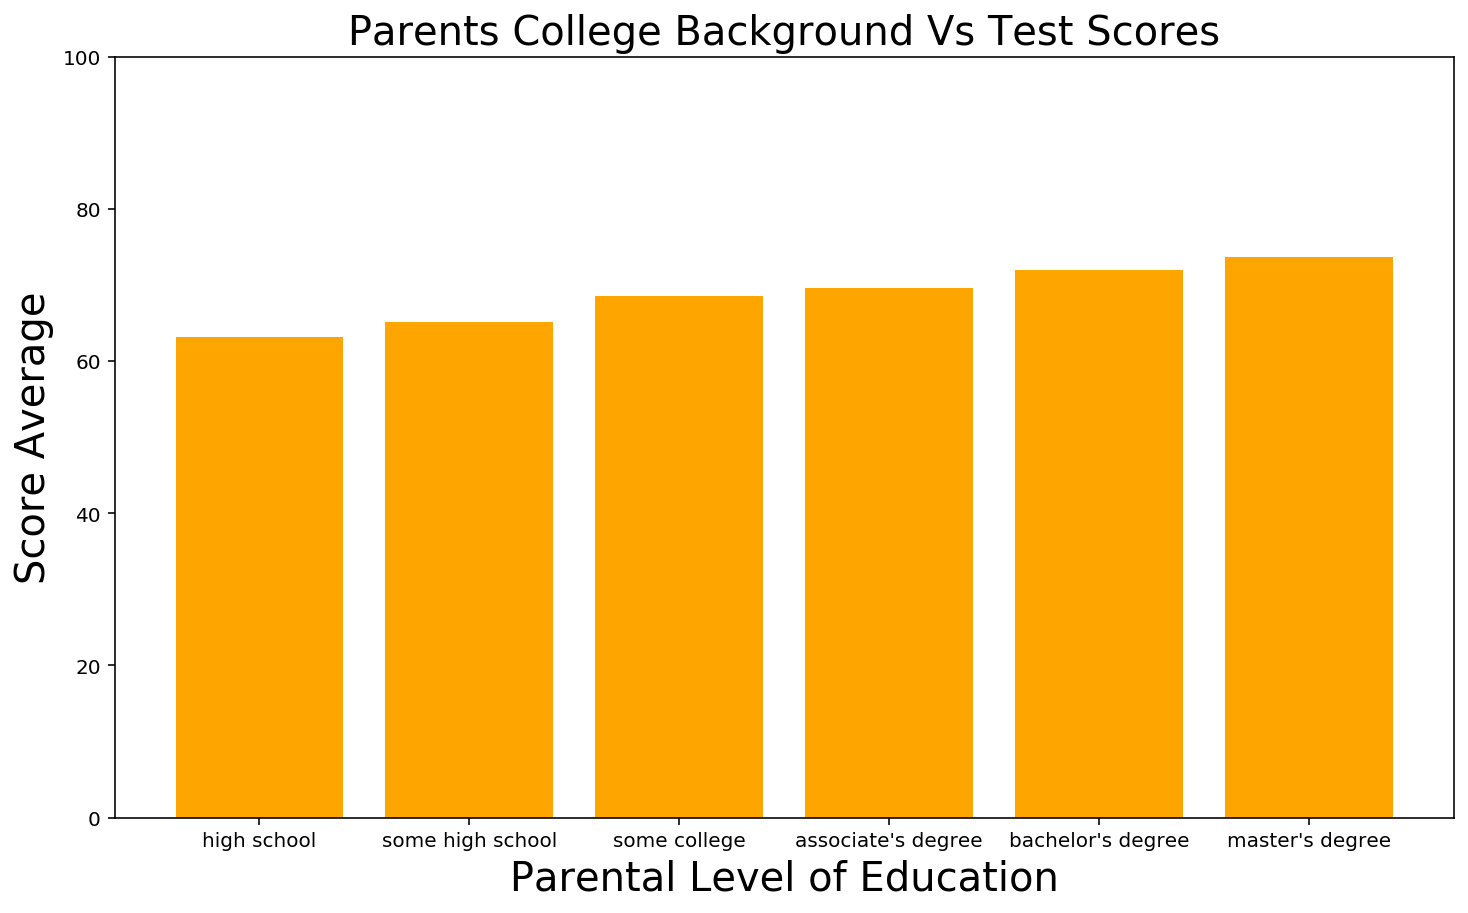

In [140]:
create_college_bars(students_df)

In [73]:
score_gr = preparation_df.groupby(['test preparation course', 'gender'])['score average'].mean().reset_index()
score1_gr = preparation1_df.groupby(['test preparation course', 'gender'])['score average'].mean().reset_index()

In [119]:
def scoreprep_bars(students_df):
    students_df['score average'] = (students_df['math score'] + students_df['reading score'] + students_df['writing score'])/3
    preparation_df = students_df[students_df['test preparation course']=="none"]
    preparation1_df = students_df[students_df['test preparation course']=="completed"]
    X = ['none', 'completed']
    Ymale = [63.044372, 70.781609]
    Zfemale = [66.878244, 74.454710]
    X_axis = np.arange(len(X))
    plt.bar(X_axis - 0.2, Ymale, 0.4, label = 'male', color='paleturquoise')
    plt.bar(X_axis + 0.2, Zfemale, 0.4, label = 'female', color='darksalmon')
    plt.xticks(X_axis, X)
    plt.xlabel("Test Preparation Course")
    plt.ylabel("Score Average")
    plt.title("Test Preparation vs Score Average", size = 20)
    plt.legend()
    plt.show()

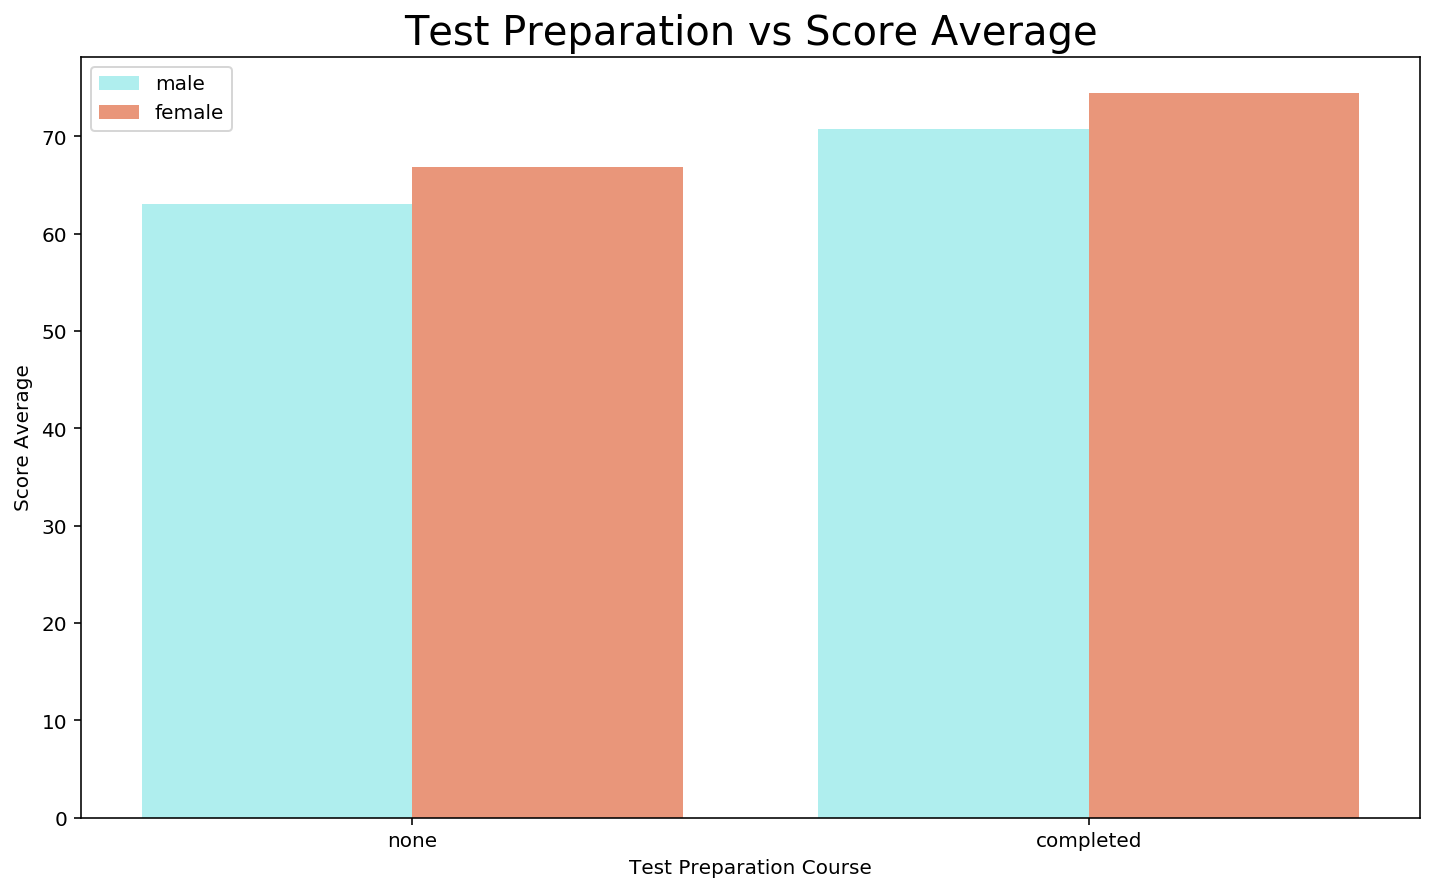

In [120]:
scoreprep_bars(students_df)

In [259]:
def sns_barplot2(students_df):
    sns.barplot(data = students_df , x = 'test preparation course', y = 'score average', hue = 'gender', ci = None, palette = "coolwarm_r")

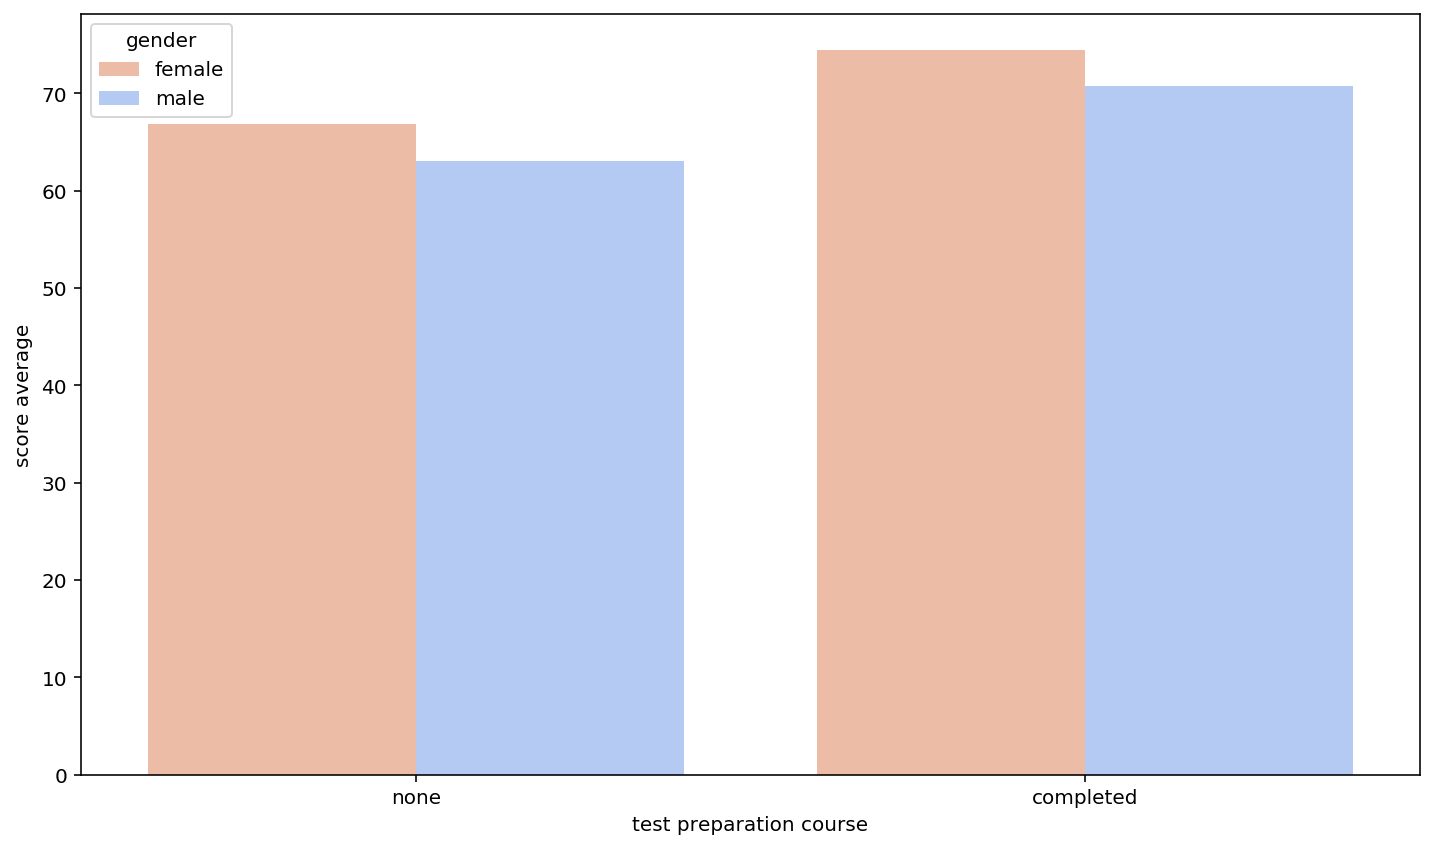

In [260]:
sns_barplot2(students_df)